##  Plasma dispersion effect

### Silicon, carrier density dependence

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from scipy.constants import pi


#plotting parameters 
line_w = 2

In [ ]:
# 1550 PIN Phase Shifter on Si

# # Original from 1987, Soref and Bennett
# # Change in index
# dn1550 = -8.8*10**(-22)*dN-8.5*10**(-18)*dP
# dn1310 = -6.2*10**(-22)*dN-6*10**(-18)*dP

# # Change in absorption per cm
# da1550 = 8.5*10**(-18)*dN+6*10**(-18)*dP
# da1310 = 6*10**(-18)*dN-4*10**(-18)*dP

# # Updated 2011 with expermental data N1.011 P0.838
# # Change in index
# dn1550 = -5.4*10**(-22)*(dN**1.011)-1.53*10**(-18)*dP**(0.838)
# dn1310 = -5.4*10**(-22)*(dN**1016)-1.53*10**(-18)*dP**(0.835)

# # Change in absorption per cm
# da1550 = 8.88*10**(-21)*(dN**1.167)+6*10**(-18)*dP**(1.109)
# da1310 = 6*10**(-18)*(dN**1.229)-4*10**(-18)*dP**(1.089)

##### It should be noted that holes have a smaller absorption as compared with electrons, whereas holes have a larger index shift. Thus, holes are most effective for providing an index shift with minimal absorption, hence modulators typically use holes for offsetjunction designs (e.g. in Mach–Zehnder or ring modulators).

![dndNdP](./Figures/dndNdP.jpg)

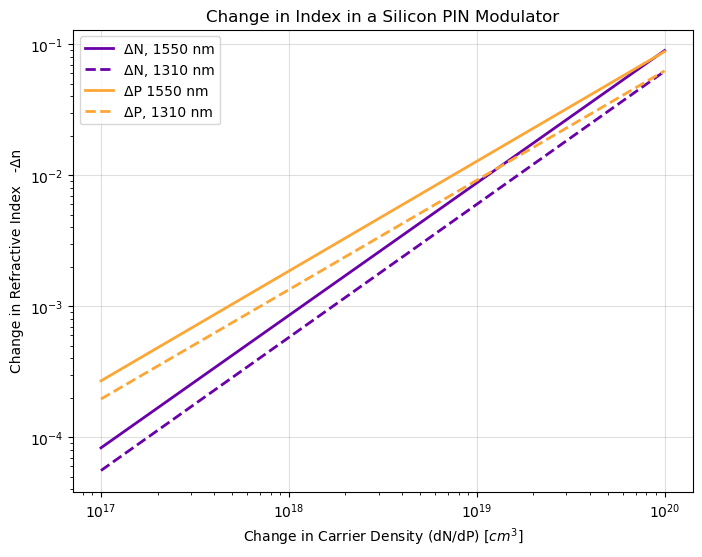

In [67]:
colors = cm.plasma(np.linspace(0.2, 0.8, 2))

# Generate values for dN and dP
CD = np.logspace(17, 20, 100)

# Compute changes in index
dndN1550 = -5.4*10**(-22)*(CD**1.011) -(1.53*10**(-18))*0**(0.838)
dndN1310 = -2.98*10**(-22)*(CD**1.016) -(1.25*10**(-18))*0**(0.835)
dndP1550 = -5.4*10**(-22)*(0**1.011)  -(1.53*10**(-18))*CD**(0.838)
dndP1310 = -2.98*10**(-22)*(0**1.016)  -(1.25*10**(-18))*CD**(0.835)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(CD, -1*dndN1550, color=colors[0], linestyle='-', linewidth=line_w, label='ΔN, 1550 nm')
plt.plot(CD, -1*dndN1310, color=colors[0], linestyle='--', linewidth=line_w, label='ΔN, 1310 nm')
plt.plot(CD, -1*dndP1550, color=colors[1], linestyle='-', linewidth=line_w, label='ΔP 1550 nm')
plt.plot(CD, -1*dndP1310, color=colors[1], linestyle='--', linewidth=line_w, label='ΔP, 1310 nm')
plt.xlabel("Change in Carrier Density (dN/dP) [$cm^3$]")
plt.ylabel("Change in Refractive Index   -Δn")
plt.title("Change in Index in a Silicon PIN Modulator")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)  
plt.show()


![dadNdP](./Figures/dadNdP.jpg)

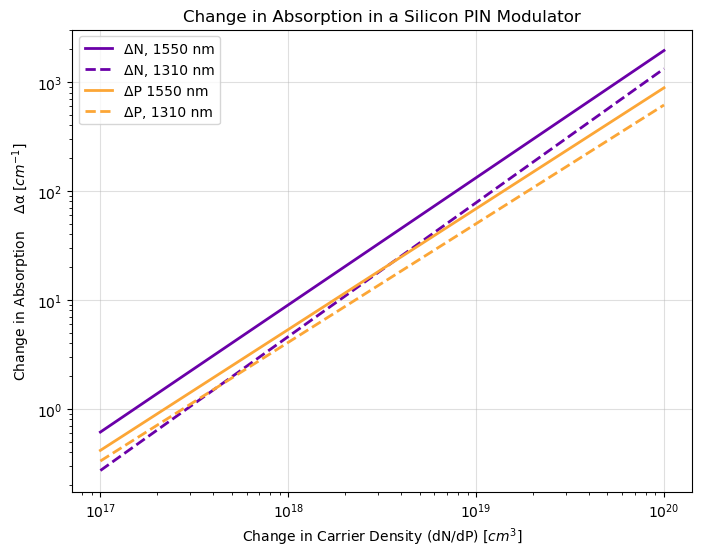

In [69]:
colors = cm.plasma(np.linspace(0.2, 0.8, 2))

# Generate values for dN and dP
CD = np.logspace(17, 20, 100)
# da1550 = 8.88*10**(-21)*(dN**1.167)+6*10**(-18)*dP**(1.109)
# da1310 = 6*10**(-18)*(dN**1.229)-4*10**(-18)*dP**(1.089)
# Compute changes in index
dadN1550 = 8.88*10**(-21)*(CD**1.167) +(5.84*10**(-20))*1**(1.109)
dadN1310 = 3.48*10**(-22)*(CD**1.229) +(1.02*10**(-19))*1**(1.089)
dadP1550 = 8.88*10**(-21)*(1**1.167)  +(5.84*10**(-20))*CD**(1.109)
dadP1310 = 3.48*10**(-22)*(1**1.229)  +(1.02*10**(-19))*CD**(1.089)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(CD, dadN1550, color=colors[0], linestyle='-', linewidth=line_w, label='ΔN, 1550 nm')
plt.plot(CD, dadN1310, color=colors[0], linestyle='--', linewidth=line_w, label='ΔN, 1310 nm')
plt.plot(CD, dadP1550, color=colors[1], linestyle='-', linewidth=line_w, label='ΔP 1550 nm')
plt.plot(CD, dadP1310, color=colors[1], linestyle='--', linewidth=line_w, label='ΔP, 1310 nm')
plt.xlabel("Change in Carrier Density (dN/dP) [$cm^3$]")
plt.ylabel("Change in Absorption    Δα [$cm^{-1}$] ")
plt.title("Change in Absorption in a Silicon PIN Modulator")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)  
plt.show()

![dndadwl](./Figures/dndadwl.jpg)

In [71]:
# def pn_depletion(wg_width, pn_offset, ds_npp, ds_ppp, T, V, pts):
#     epsilon0 = 8.854187817620e-12  # [F/m]
#     epsilon_s = 11.8  # relative dielectric constant for Si
#     q = 1.60217646e-19  # electronic charge [Coulombs]
#     kB = 1.3806503e-23  # Boltzmann constant in J/K
#     T += 273.15  # Temperature [K]
#     VT = kB * T / q

#     # Material constants
#     NA_plus = 4.4e20 * 1e6  # cm^-3 * 1e6
#     ND_plus = 4.4e20 * 1e6
#     NA = 5e17 * 1e6
#     ND = 3e17 * 1e6
#     Rs_rib_n = 2.5e3
#     Rs_rib_p = 4.0e3
#     Rs_slab_n = 0.6e4
#     Rs_slab_p = 1e4
#     h_rib = 220e-9
#     h_slab = 90e-9
#     h = 4.135e-15  # Planck's constant [eV-s]
#     m_0 = 9.11e-31  # electron mass [kg]
#     m_n = 1.08 * m_0  # Effective mass for electrons
#     m_p = 1.15 * m_0  # Effective mass for holes
#     Nc = 2 * (2 * np.pi * m_n * (kB / q) * T / h**2)**(3/2) / (q)**(3/2)
#     Nv = 2 * (2 * np.pi * m_p * (kB / q) * T / h**2)**(3/2) / (q)**(3/2)
#     Eg = 1.1242  # Band gap for Si [eV]
#     ni = np.sqrt(Nc * Nv) * np.exp(-Eg / (2 * (kB / q) * T))  # Intrinsic carriers in m^-3
#     Vbi = VT * np.log(NA * ND / ni**2)  # Built-in potential
    
#     Wd = np.sqrt(2 * epsilon0 * epsilon_s * (NA + ND) / (q * NA * ND) * (Vbi - V))  # Depletion width
#     xp = -Wd / (1 + NA / ND) + pn_offset
#     xn = Wd / (1 + ND / NA) + pn_offset
    
#     del_x = wg_width / (pts - 1)
#     x_ppp = -ds_ppp + pn_offset
#     x_npp = ds_npp + pn_offset
#     x_min = x_ppp - 500e-9
#     x_max = x_npp + 500e-9
    
#     x_NA_plus = np.arange(x_min, x_ppp, del_x)
#     x_NA = np.arange(x_ppp, xp, del_x)
#     x_dep = np.arange(xp, xn, del_x)
#     x_ND = np.arange(xn + del_x, x_npp, del_x)
#     x_ND_plus = np.arange(x_npp + del_x, x_max, del_x)
#     x = np.concatenate([x_NA_plus, x_NA, x_dep, x_ND, x_ND_plus])
    
#     n0_NA = ni**2 / NA
#     p0_ND = ni**2 / ND
#     n0_NA_plus = ni**2 / NA_plus
#     p0_ND_plus = ni**2 / ND_plus
    
#     del_n_NA = n0_NA * (np.exp(q * V / (kB * T)) - 1) * (1 - np.abs((x_NA - xp) / (xp - x_ppp)))
#     del_p_ND = p0_ND * (np.exp(q * V / (kB * T)) - 1) * (1 - np.abs((x_ND - xn) / (x_npp - xn)))
    
#     n_NA = n0_NA + del_n_NA
#     p_ND = p0_ND + del_p_ND
#     p_dep = np.zeros(len(x_dep))
#     n_dep = np.zeros(len(x_dep))
#     p_NA = np.ones(len(x_NA)) * NA
#     n_ND = np.ones(len(x_ND)) * ND
#     n_NA_plus = np.ones(len(x_NA_plus)) * n0_NA_plus
#     p_ND_plus = np.ones(len(x_ND_plus)) * p0_ND_plus
#     p_NA_plus = np.ones(len(x_NA_plus)) * NA_plus
#     n_ND_plus = np.ones(len(x_ND_plus)) * ND_plus
    
#     n = np.concatenate([n_NA_plus, n_NA, n_dep, n_ND, n_ND_plus])
#     p = np.concatenate([p_NA_plus, p_NA, p_dep, p_ND, p_ND_plus])
    
#     Rj = ((wg_width / 2 - xn) * Rs_rib_n + (wg_width / 2 + xp) * Rs_rib_p + (-wg_width / 2 - x_ppp) * Rs_slab_p + (x_npp - wg_width / 2) * Rs_slab_n)
#     Cj = np.sqrt(q * epsilon0 * epsilon_s / 2 / (1 / ND + 1 / NA) / (Vbi - V)) * h_rib
    
#     return x, n, p, Rj, Cj

In [73]:
# def neff_V(lambda_, t, w, t_slab, n_core, n_clad, n_oxide, pn_offset, ds_n_plus, ds_p_plus, pts, T, V):
#     n, p, xdoping, xn, xp, Rj, Cj = pn_depletion(w, pn_offset, ds_n_plus, ds_p_plus, T, V, pts)
    
#     xwg, TM_E_TEwg, neff0 = wg_TElike_1Dprofile_neff(lambda_, t, w, t_slab, n_core, n_clad, n_oxide, pts)
#     Ewg = np.conj(TM_E_TEwg[:, 0])  # Transpose and conjugate
    
#     interp_n = interp1d(xdoping, n, fill_value='extrapolate')
#     interp_p = interp1d(xdoping, p, fill_value='extrapolate')
    
#     n_wg = interp_n(xwg)
#     p_wg = interp_p(xwg)
    
#     dxwg = np.zeros_like(xwg)
#     dxwg[0] = xwg[1] - xwg[0]
#     dxwg[-1] = xwg[-1] - xwg[-2]
#     for i in range(1, len(xwg) - 1):
#         dxwg[i] = (xwg[i + 1] - xwg[i - 1]) / 2
    
#     del_ne = -3.64e-10 * lambda_**2 * np.sum(Ewg * (n_wg * 1e-6) * Ewg * dxwg) / np.sum(Ewg * Ewg * dxwg)
#     del_nh = -3.51e-6 * lambda_**2 * np.sum(Ewg * (p_wg * 1e-6)**0.8 * Ewg * dxwg) / np.sum(Ewg * Ewg * dxwg)
#     del_neff = del_ne + del_nh
#     neff = neff0 + del_neff
    
#     del_alpha_e = 3.52e-6 * lambda_**2 * np.sum(Ewg * (n_wg * 1e-6) * Ewg * dxwg) / np.sum(Ewg * Ewg * dxwg)
#     del_alpha_h = 2.4e-6 * lambda_**2 * np.sum(Ewg * (p_wg * 1e-6) * Ewg * dxwg) / np.sum(Ewg * Ewg * dxwg)
#     alpha = del_alpha_e + del_alpha_h
    
#     M = min(ds_n_plus - pn_offset + 0.5e-6, ds_p_plus + pn_offset + 0.5e-6) / w - 0.5
    
#     return neff, alpha, Rj, Cj


In [75]:

# def neff_V_plot(lambda_, t, w, t_slab, n_core, n_clad, n_oxide, pn_offset, ds_n_plus, ds_p_plus, pts, T, V):
#     neff = np.zeros(len(V))
#     alpha = np.zeros(len(V))
#     Rj = np.zeros(len(V))
#     Cj = np.zeros(len(V))
    
#     for i in range(len(V)):
#         neff[i], alpha[i], Rj[i], Cj[i] = neff_V(lambda_, t, w, t_slab, n_core, n_clad, n_oxide, pn_offset, ds_n_plus, ds_p_plus, pts, T, V[i])
    
#     neff_v0, alpha_v0 = neff_V(lambda_, t, w, t_slab, n_core, n_clad, n_oxide, pn_offset, ds_n_plus, ds_p_plus, pts, T, 0)
    
#     delta_neff = neff - neff_v0
#     alpha_dB = -10 * np.log10(np.exp(-alpha))
    
#     plt.figure()
#     plt.plot(-V, delta_neff)
#     plt.xlabel("-Voltage (V)")
#     plt.ylabel("Delta Neff")
#     plt.title("Change in Effective Index")
#     plt.grid()
    
#     plt.figure()
#     plt.plot(-V, alpha_dB)
#     plt.xlabel("-Voltage (V)")
#     plt.ylabel("Alpha (dB)")
#     plt.title("Absorption Coefficient")
#     plt.grid()
    
#     # Phase shift per cm
#     delta_phi = (2 * pi / lambda_) * delta_neff * 1e-2 / pi  # per cm
#     plt.figure()
#     plt.plot(-V, delta_phi, linewidth=2)
#     plt.xlabel("-Voltage (V)")
#     plt.ylabel("Delta Phi (per cm)")
#     plt.title("Phase Shift per cm")
#     plt.grid()
    
#     # Cut-off frequency
#     fc = 1. / (2 * pi * Rj * Cj) * 1e-9  # in GHz
#     plt.figure()
#     plt.plot(-V, fc, linewidth=2)
#     plt.xlabel("-Voltage (V)")
#     plt.ylabel("Cut-off Frequency (GHz)")
#     plt.title("Cut-off Frequency")
#     plt.grid()
    
#     plt.show()
    
#     return neff, alpha, delta_neff, delta_phi, fc


In [80]:

# # Example parameters
# lambda_ = 1.55e-6  # Wavelength in meters
# t = 220e-9         # Waveguide thickness
# w = 500e-9         # Waveguide width
# t_slab = 90e-9     # Slab thickness
# n_core = 3.47      # Core refractive index
# n_clad = 1.44      # Cladding refractive index
# n_oxide = 1.44     # Oxide refractive index
# pn_offset = 50e-9  # PN junction offset
# ds_n_plus = 1e-6   # N++ region distance from junction
# ds_p_plus = 1e-6   # P++ region distance from junction
# pts = 500          # Number of points
# T = 25             # Temperature in Celsius
# V = np.linspace(-5, 1, 7)  # Voltage range from -5V to 1V

# # Compute effective index and other properties
# neff_list, alpha_list, Rj_list, Cj_list = [], [], [], []
# for v in V:
#     neff, alpha, Rj, Cj = neff_V(lambda_, t, w, t_slab, n_core, n_clad, n_oxide,
#                                  pn_offset, ds_n_plus, ds_p_plus, pts, T, v)
#     neff_list.append(neff)
#     alpha_list.append(alpha)
#     Rj_list.append(Rj)
#     Cj_list.append(Cj)

# # Convert to numpy arrays for plotting
# neff_list = np.array(neff_list)
# alpha_list = np.array(alpha_list)
# Rj_list = np.array(Rj_list)
# Cj_list = np.array(Cj_list)

# # Plot change in effective index
# plt.figure()
# plt.plot(-V, neff_list, marker='o')
# plt.xlabel("Voltage (V)")
# plt.ylabel("Effective Index (neff)")
# plt.title("Effective Index vs. Voltage")
# plt.grid()
# plt.show()

# # Plot absorption loss
# plt.figure()
# alpha_dB = -10 * np.log10(np.exp(-alpha_list))
# plt.plot(-V, alpha_dB, marker='o')
# plt.xlabel("Voltage (V)")
# plt.ylabel("Absorption Loss (dB)")
# plt.title("Absorption Loss vs. Voltage")
# plt.grid()
# plt.show()

# # Compute phase shift per cm
# delta_phi = (2 * np.pi / lambda_) * (neff_list - neff_list[0]) * 1e-2 / np.pi

# plt.figure()
# plt.plot(-V, delta_phi, marker='o', linewidth=2)
# plt.xlabel("Voltage (V)")
# plt.ylabel("Phase Shift per cm")
# plt.title("Phase Shift vs. Voltage")
# plt.grid()
# plt.show()

# # Compute cutoff frequency
# fc = 1 / (2 * np.pi * Rj_list * Cj_list) * 1e-9  # in GHz
# plt.figure()
# plt.plot(-V, fc, marker='o', linewidth=2)
# plt.xlabel("Voltage (V)")
# plt.ylabel("Cutoff Frequency (GHz)")
# plt.title("Cutoff Frequency vs. Voltage")
# plt.grid()
# plt.show()